In [26]:
%matplotlib inline
from astropy.io import fits
from astropy import units as u
import os
import pickle as pickle
from astropy.stats import sigma_clipped_stats
from astropy.time import Time
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pickle
from spectools_ir.slabspec import make_spec
import sys;print(sys.prefix)

C:\Users\taiwe\anaconda3


In [2]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle
import os
import pandas as pd

from spec_utils.spec_utils import read_irs

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


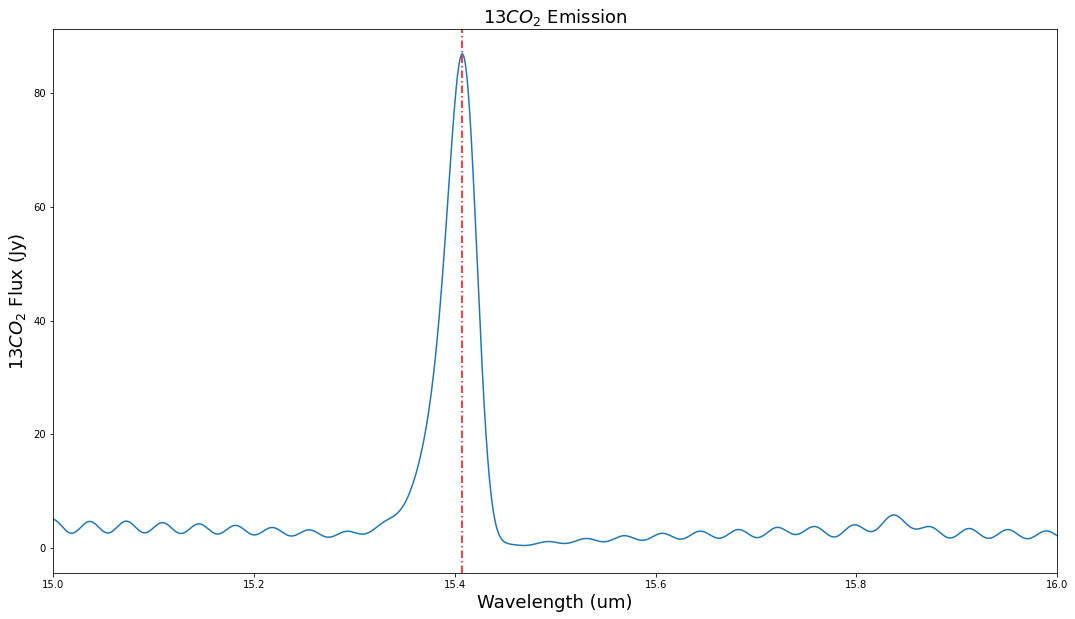

In [3]:
out_13co2=pickle.load(open(r"C:\Users\taiwe\Documents\13co2_1e19_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_13co2['spectrum']['wave'],out_13co2['spectrum']['convolflux'])
plt.xlim(15, 16)
plt.title('13$CO_2$ Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('13$CO_2$ Flux (Jy)',fontsize=18)

from scipy.signal import find_peaks
p13 = find_peaks(out_13co2['spectrum']['convolflux'], height=20)
peak13 = out_13co2['spectrum']['wave'][p13[0][0]]
plt.axvline(x=peak13,c='red', dashes=(5, 2, 1, 2))

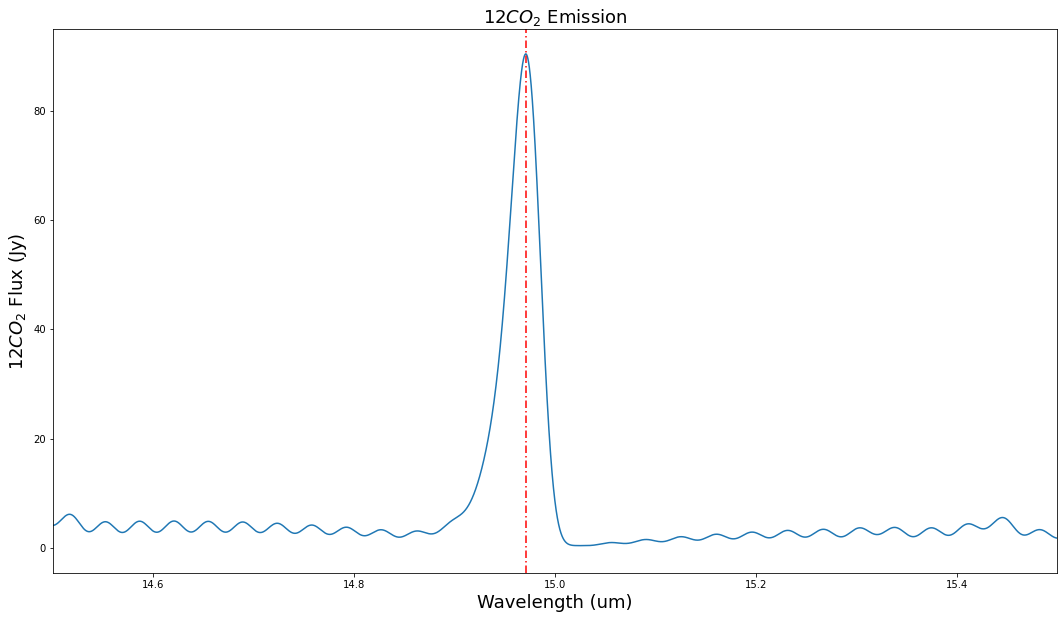

In [4]:
out_12co2=pickle.load(open(r"C:\Users\taiwe\Documents\co2_1e19_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_12co2['spectrum']['wave'],out_12co2['spectrum']['convolflux'])
plt.xlim(14.5, 15.5)
plt.title('12$CO_2$ Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('12$CO_2$ Flux (Jy)',fontsize=18)

from scipy.signal import find_peaks
p12 = find_peaks(out_12co2['spectrum']['convolflux'], height=20)
peak12 = out_12co2['spectrum']['wave'][p12[0][0]]
plt.axvline(x=peak12,c='red', dashes=(5, 2, 1, 2))

Text(0, 0.5, '$H_2$16O Flux (Jy)')

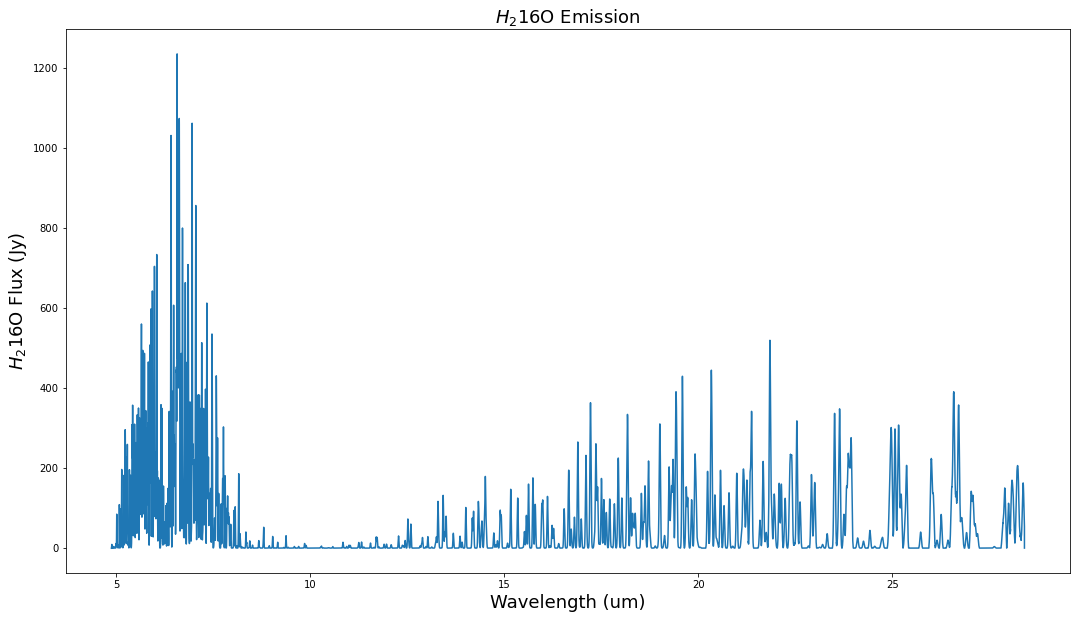

In [5]:
out_H216O=pickle.load(open("Docs\h2o_1e22_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_H216O['spectrum']['wave'],out_H216O['spectrum']['convolflux'])
#plt.xlim(14.8, 15.6)
#plt.ylim(0, 200)
plt.title('$H_2$16O Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('$H_2$16O Flux (Jy)',fontsize=18)

Text(0, 0.5, '$H_2$18O Flux (Jy)')

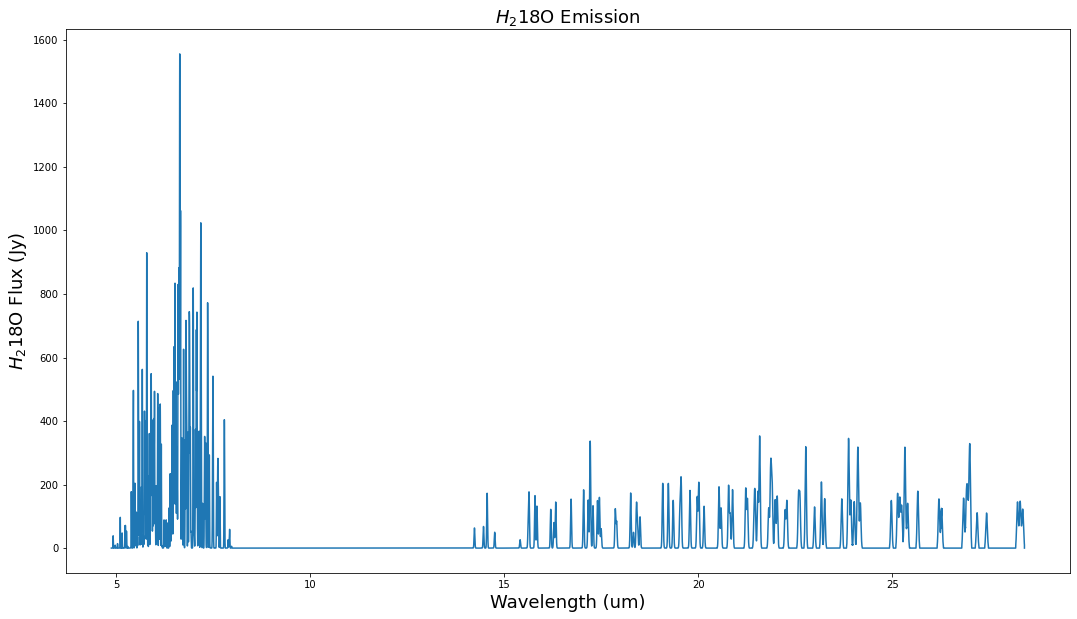

In [6]:
out_H218O=pickle.load(open("Docs\h218o_1e22_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_H218O['spectrum']['wave'],out_H218O['spectrum']['convolflux'])
#plt.xlim(14.8, 15.6)
#plt.ylim(0, 50)
plt.title('$H_2$18O Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('$H_2$18O Flux (Jy)',fontsize=18)

(-0.1, 0.5)

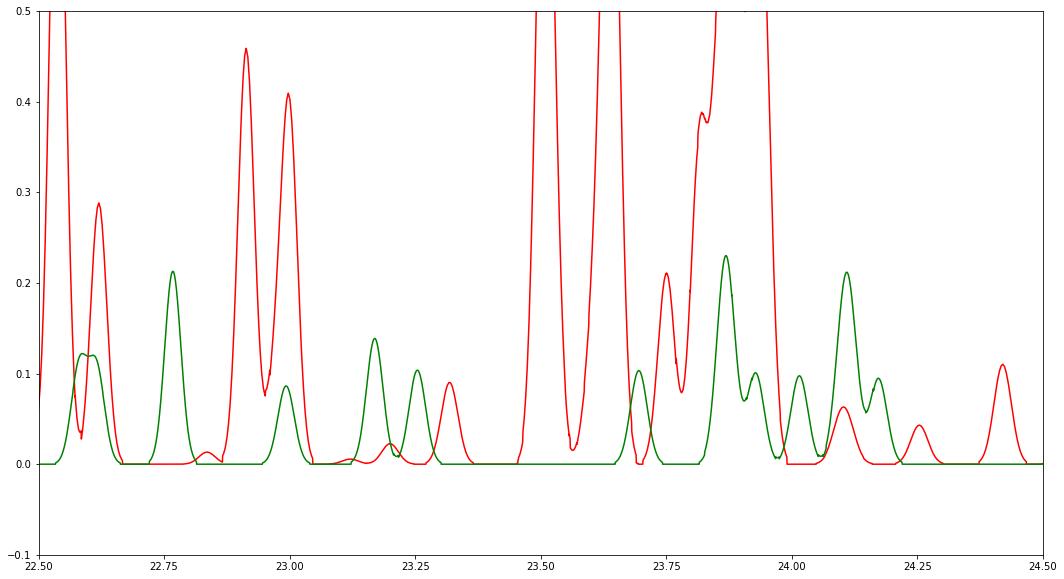

In [7]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 400
plt.plot(flux161, flux162, c='red')

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 1500
plt.plot(flux181, flux182, c='green')

plt.xlim(22.5, 24.5)
plt.ylim(-.1, .5)

(-0.1, 0.5)

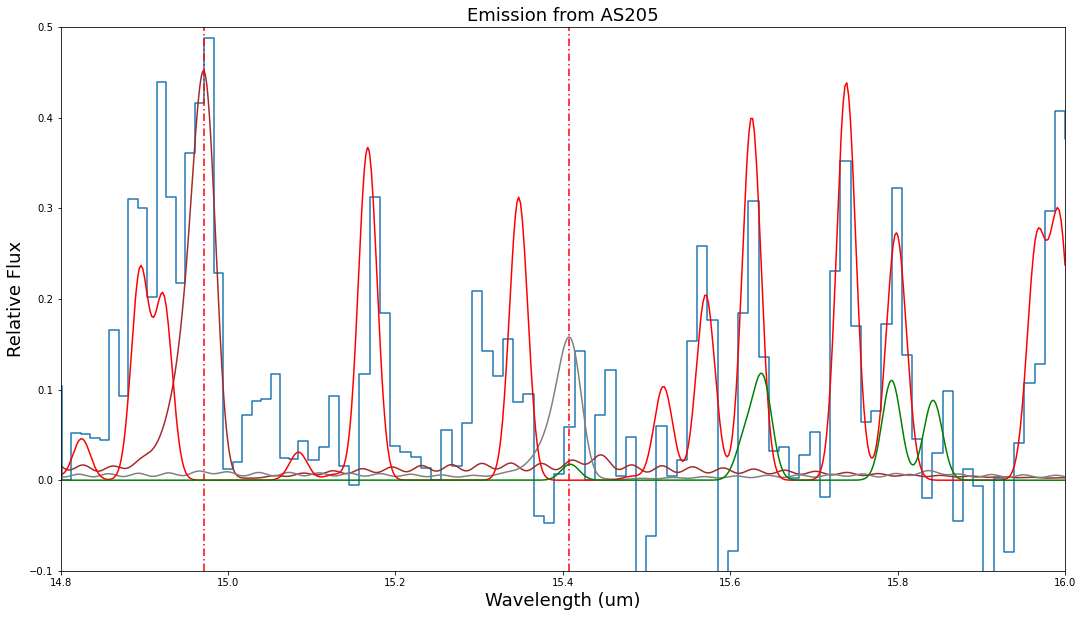

In [8]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 200

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 550

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 400

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('AS205_c2d',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux161, flux162, c='red')

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 1500
plt.plot(flux181, flux182, c='green')

plt.title('Emission from AS205',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.1, .5)

(-0.1, 0.5)

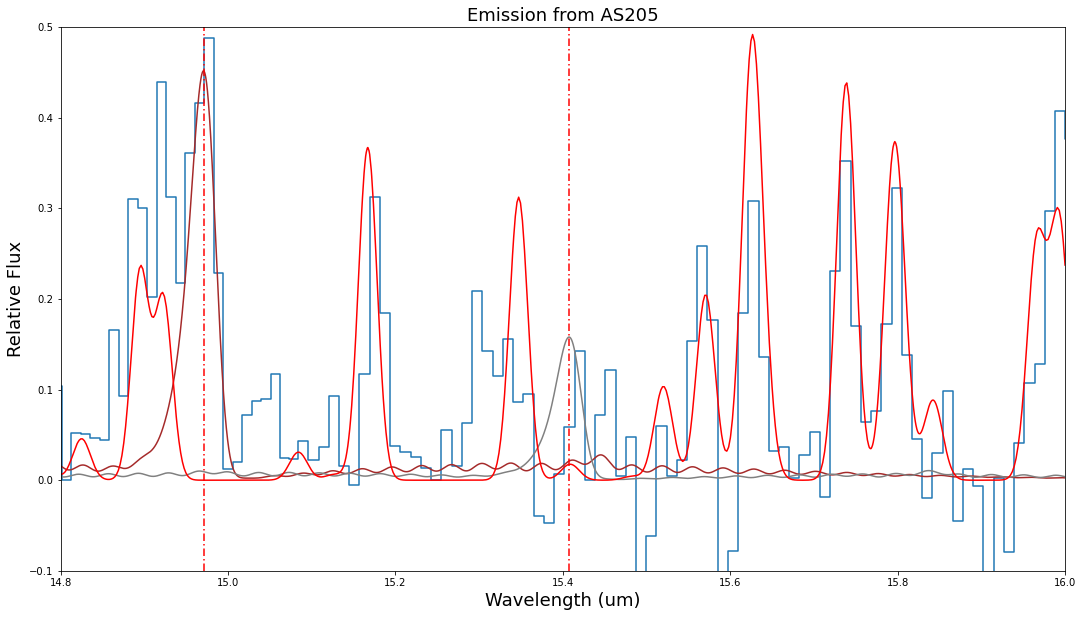

In [9]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 200

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 550

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 400

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('AS205_c2d',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 1500

totflux = flux162+flux182
plt.plot(flux161, totflux, c='red')

plt.title('Emission from AS205',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.1, .5)

<Figure size 1296x720 with 0 Axes>

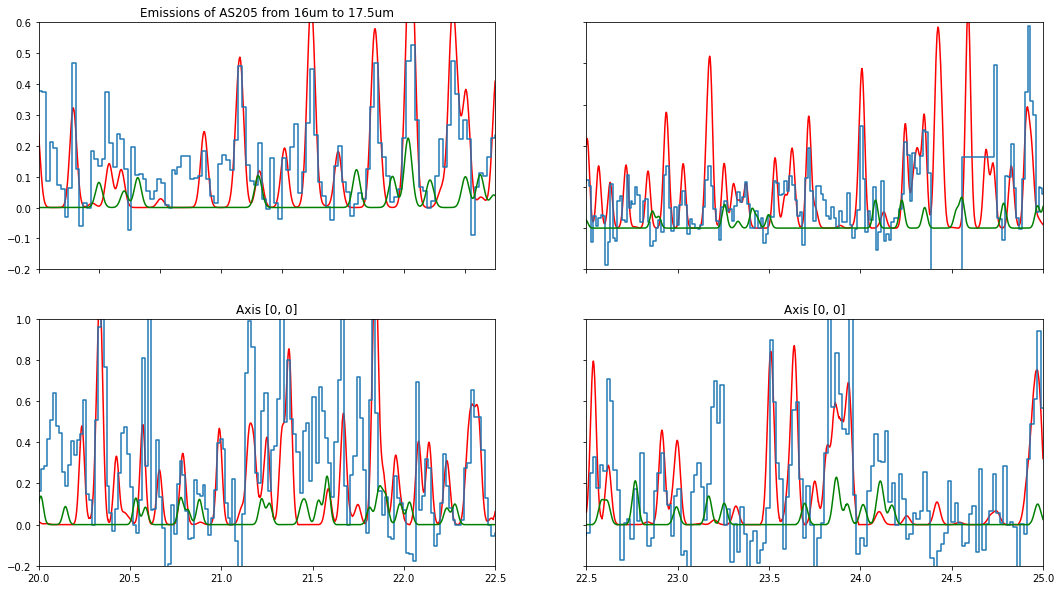

In [10]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 400

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('AS205_c2d',dd=path,noerror=True)
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 1500


fig, axs = plt.subplots(2, 2,figsize=(18, 10))
axs[0, 0].plot(flux161, flux162, c='red')
axs[0, 0].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[0, 0].plot(flux181, flux182, c='green')
axs[0, 0].set_xlim(16, 17.5)
axs[0, 0].set_ylim(-.2, 0.6)
axs[0, 0].set_title('Emissions of AS205 from 16um to 17.5um')
axs[0, 1].plot(flux161, flux162, c='red')
axs[0, 1].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[0, 1].plot(flux181, flux182, c='green')
axs[0, 1].set_xlim(17.5, 20)
axs[0, 1].set_ylim(-.2, 1)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].plot(flux161, flux162, c='red')
axs[1, 0].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[1, 0].plot(flux181, flux182, c='green')
axs[1, 0].set_xlim(20, 22.5)
axs[1, 0].set_ylim(-.2, 1)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 1].plot(flux161, flux162, c='red')
axs[1, 1].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[1, 1].plot(flux181, flux182, c='green')
axs[1, 1].set_xlim(22.5, 25)
axs[1, 1].set_ylim(-.2, 1)
axs[1, 1].set_title('Axis [0, 0]')


for ax in axs.flat:
    ax.label_outer()

(-0.01, 0.05)

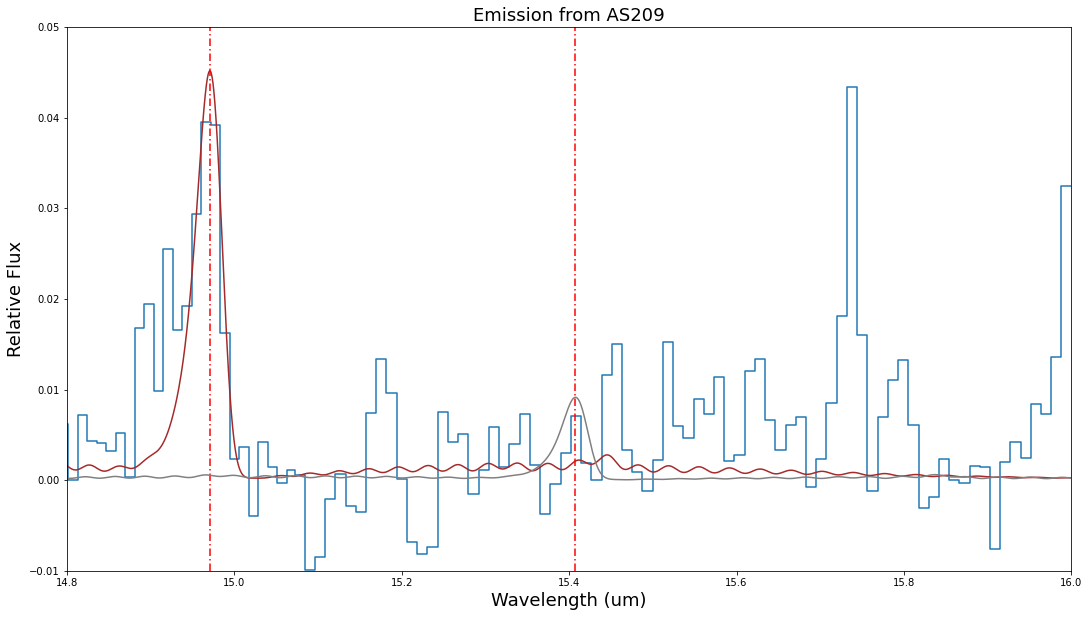

In [11]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 2000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 9500

path = os.getcwd() + '/REDUCED/'
iras =read_irs('04385+2550',dd=path,noerror=True)
plt.plot(iras.wave,iras.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from AS209',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.01, 0.05)

(-0.05, 0.15)

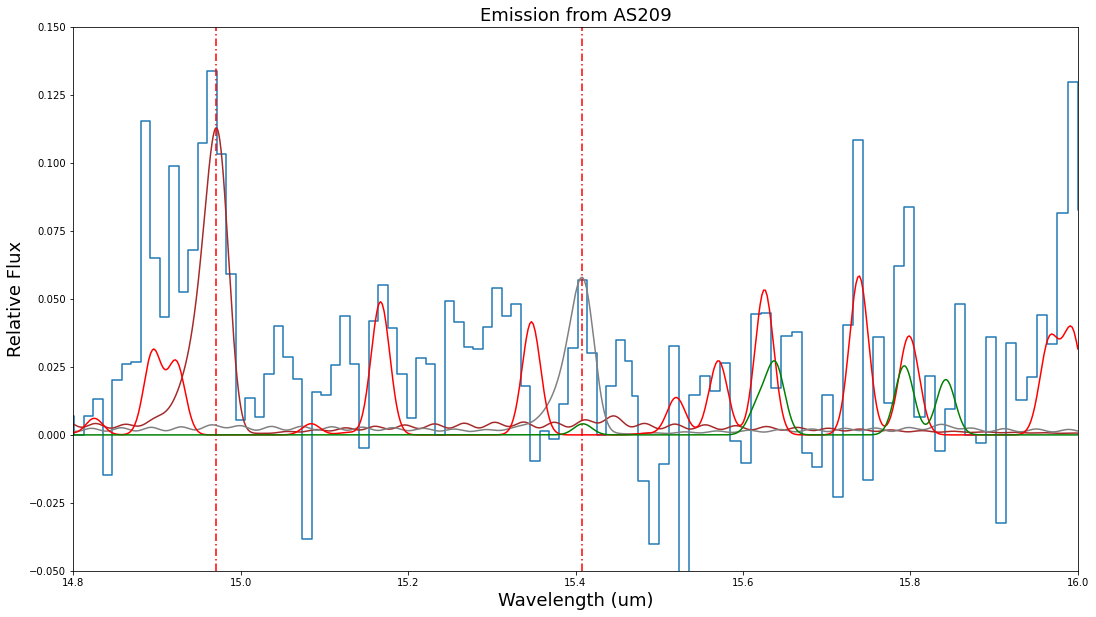

In [12]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 800

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 1500

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 3000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('V1121OPH',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux161, flux162, c='red')

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 6500
plt.plot(flux181, flux182, c='green')

plt.title('Emission from AS209',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.05, 0.15)

(-0.05, 0.15)

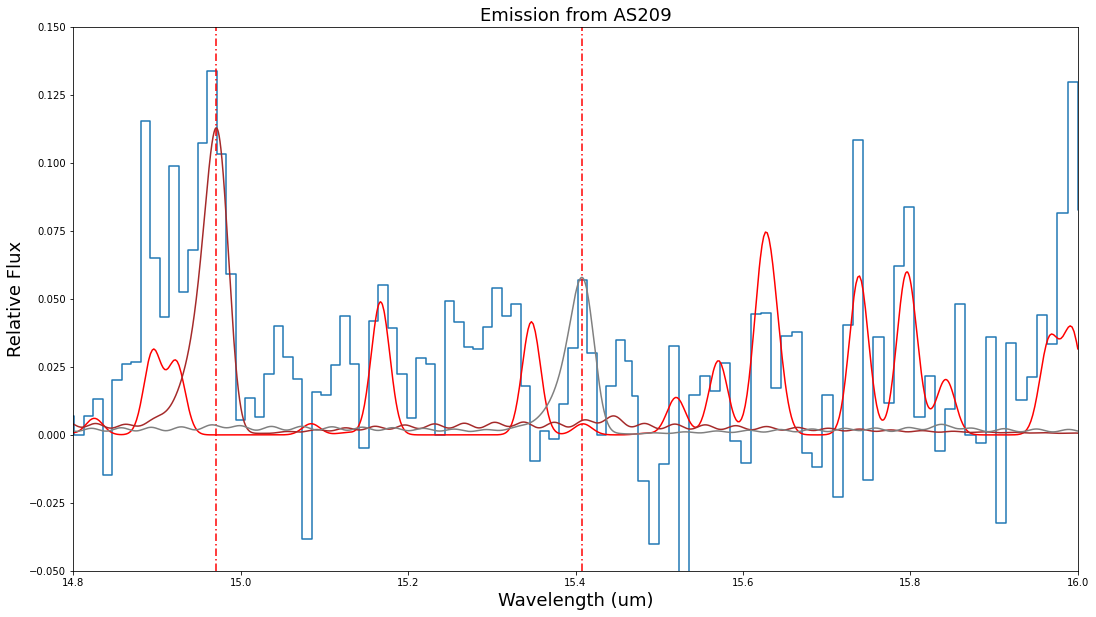

In [13]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 800

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 1500

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 3000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('V1121OPH',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 6500
totflux = flux162+flux182
plt.plot(flux161, totflux, c='red')
plt.plot(flux121, flux122, c='brown')
plt.plot(flux131, flux132, c='grey')

plt.title('Emission from AS209',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.05, 0.15)

<Figure size 1296x720 with 0 Axes>

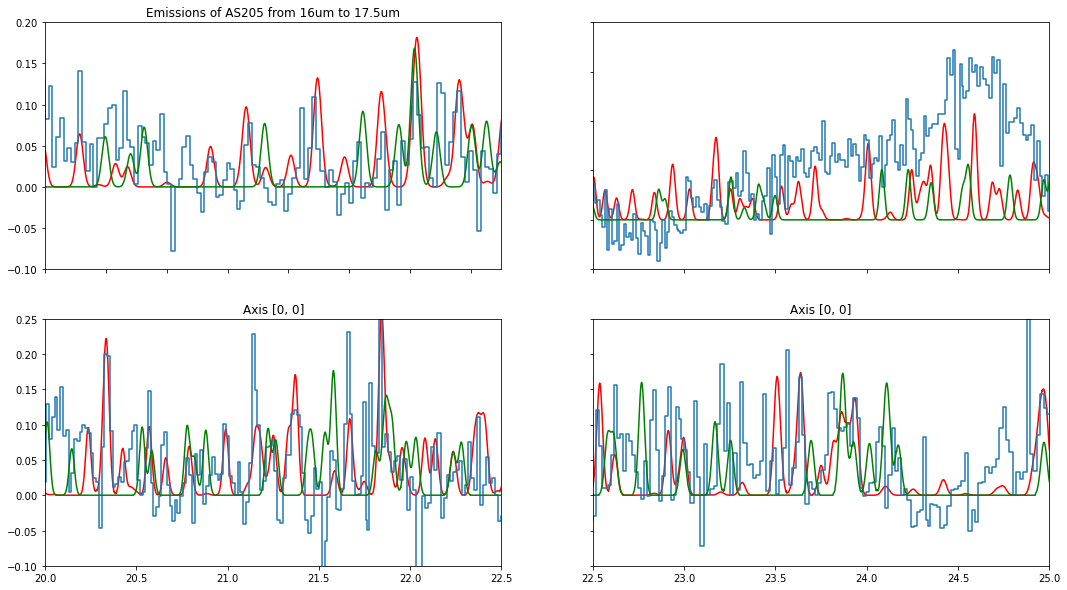

In [14]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 2000

path = os.getcwd() + '/REDUCED/'
as209=read_irs('V1121OPH',dd=path,noerror=True)
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 2000


fig, axs = plt.subplots(2, 2,figsize=(18, 10))
axs[0, 0].plot(flux161, flux162, c='red')
axs[0, 0].plot(as209.wave,as209.flux, drawstyle='steps-mid')
axs[0, 0].plot(flux181, flux182, c='green')
axs[0, 0].set_xlim(16, 17.5)
axs[0, 0].set_ylim(-.1, .2)
axs[0, 0].set_title('Emissions of AS205 from 16um to 17.5um')
axs[0, 1].plot(flux161, flux162, c='red')
axs[0, 1].plot(as209.wave,as209.flux, drawstyle='steps-mid')
axs[0, 1].plot(flux181, flux182, c='green')
axs[0, 1].set_xlim(17.5, 20)
axs[0, 1].set_ylim(-.1, .4)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].plot(flux161, flux162, c='red')
axs[1, 0].plot(as209.wave,as209.flux, drawstyle='steps-mid')
axs[1, 0].plot(flux181, flux182, c='green')
axs[1, 0].set_xlim(20, 22.5)
axs[1, 0].set_ylim(-.1, .25)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 1].plot(flux161, flux162, c='red')
axs[1, 1].plot(as209.wave,as209.flux, drawstyle='steps-mid')
axs[1, 1].plot(flux181, flux182, c='green')
axs[1, 1].set_xlim(22.5, 25)
axs[1, 1].set_ylim(-.1, .25)
axs[1, 1].set_title('Axis [0, 0]')


for ax in axs.flat:
    ax.label_outer()

(-0.01, 0.035)

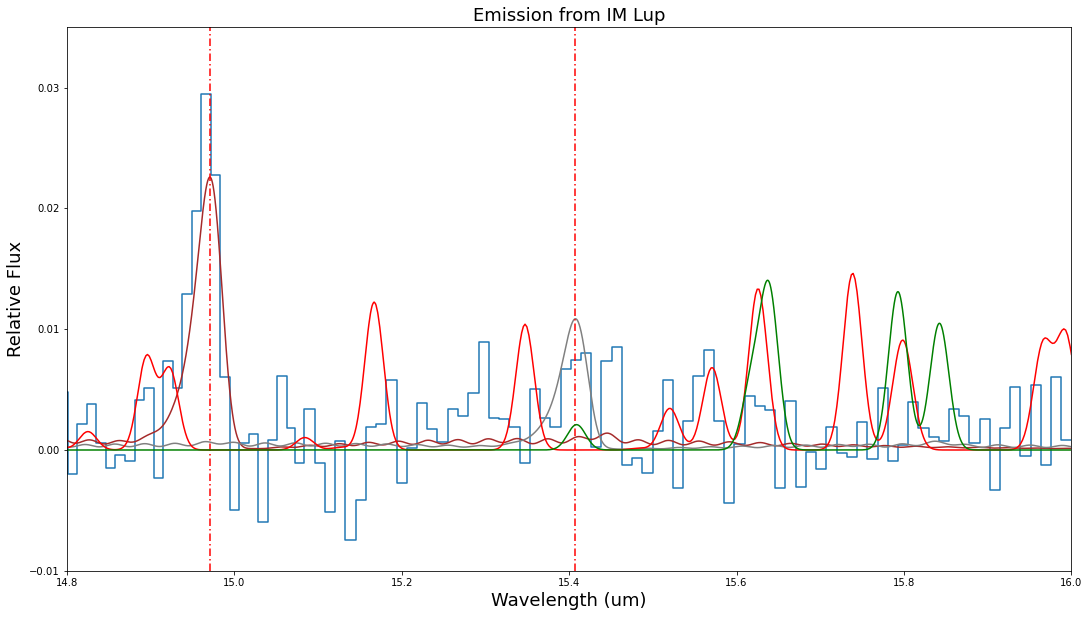

In [15]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('IMLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux+0.005-((gwlup.wave-14.8)*0.0075), drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 12000
plt.plot(flux161, flux162, c='red')

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 12600
plt.plot(flux181, flux182, c='green')

plt.title('Emission from IM Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.01, .035)

<Figure size 1296x720 with 0 Axes>

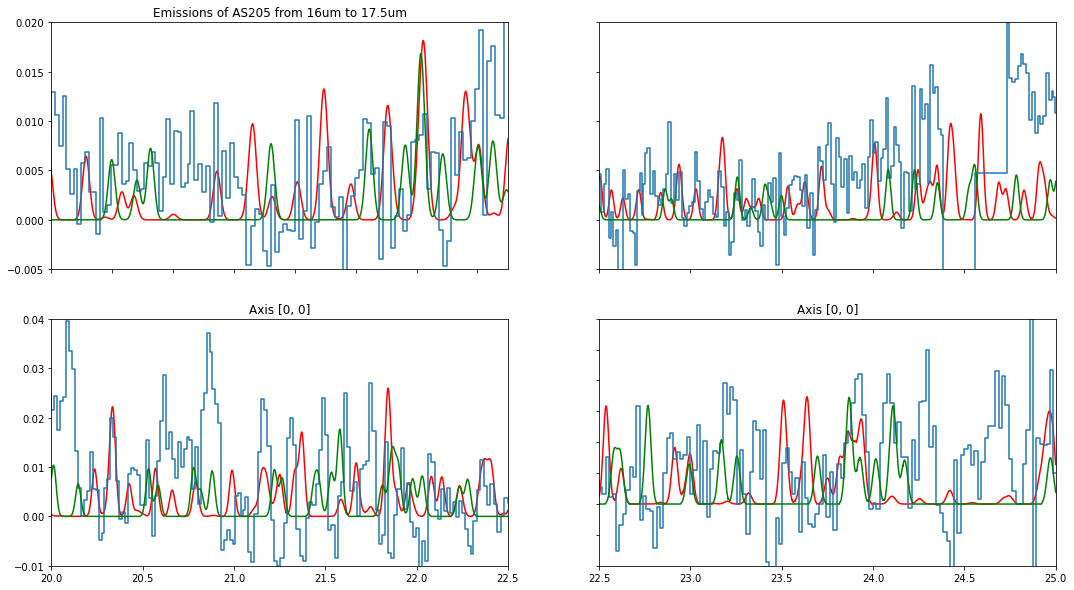

In [16]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 20000

path = os.getcwd() + '/REDUCED/'
imlup=read_irs('IMLUP',dd=path,noerror=True)
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 20000


fig, axs = plt.subplots(2, 2,figsize=(18, 10))
axs[0, 0].plot(flux161, flux162, c='red')
axs[0, 0].plot(imlup.wave,imlup.flux+((imlup.wave-16.1)*0.01), drawstyle='steps-mid')
axs[0, 0].plot(flux181, flux182, c='green')
axs[0, 0].set_xlim(16, 17.5)
axs[0, 0].set_ylim(-.005, .02)
axs[0, 0].set_title('Emissions of AS205 from 16um to 17.5um')
axs[0, 1].plot(flux161, flux162, c='red')
axs[0, 1].plot(imlup.wave,imlup.flux, drawstyle='steps-mid')
axs[0, 1].plot(flux181, flux182, c='green')
axs[0, 1].set_xlim(17.5, 20)
axs[0, 1].set_ylim(-.01, .04)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].plot(flux161, flux162, c='red')
axs[1, 0].plot(imlup.wave,imlup.flux, drawstyle='steps-mid')
axs[1, 0].plot(flux181, flux182, c='green')
axs[1, 0].set_xlim(20, 22.5)
axs[1, 0].set_ylim(-.01, .04)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 1].plot(flux161, flux162, c='red')
axs[1, 1].plot(imlup.wave,imlup.flux, drawstyle='steps-mid')
axs[1, 1].plot(flux181, flux182, c='green')
axs[1, 1].set_xlim(22.5, 25)
axs[1, 1].set_ylim(-.01, .03)
axs[1, 1].set_title('Axis [0, 0]')


for ax in axs.flat:
    ax.label_outer()

(-0.015, 0.05)

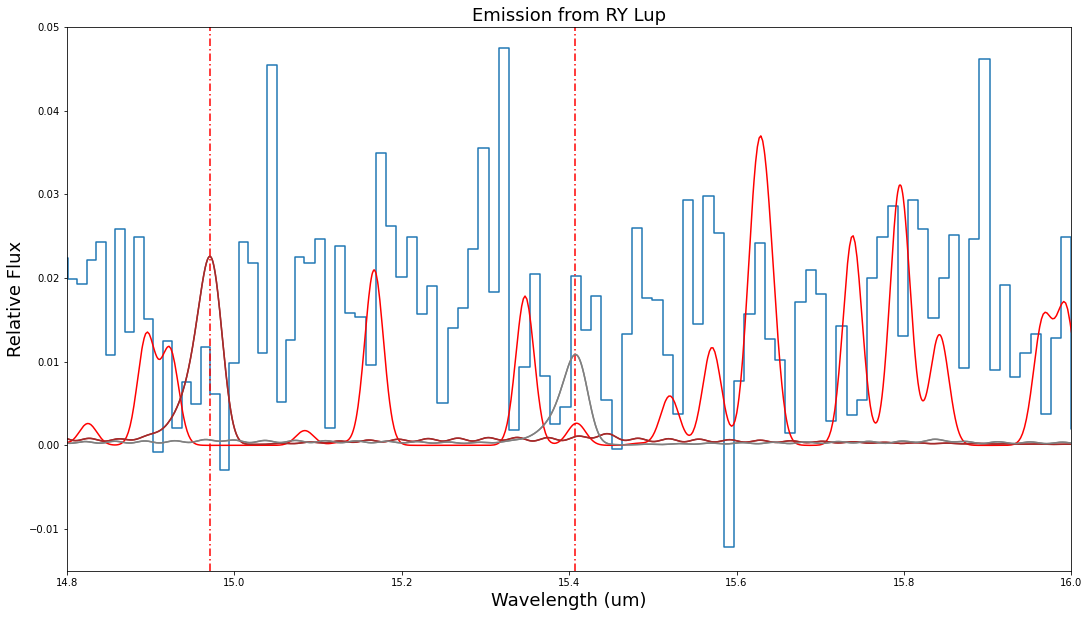

In [17]:
fig=plt.figure(1,figsize=(18,10))
flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('RYLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux+0.02-((gwlup.wave-14.8)*0.01), drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 7000
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 10000
totflux = flux162+flux182
plt.plot(flux161, totflux, c='red')
plt.plot(flux121, flux122, c='brown')
plt.plot(flux131, flux132, c='grey')

plt.title('Emission from RY Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.015, .05)

<Figure size 1296x720 with 0 Axes>

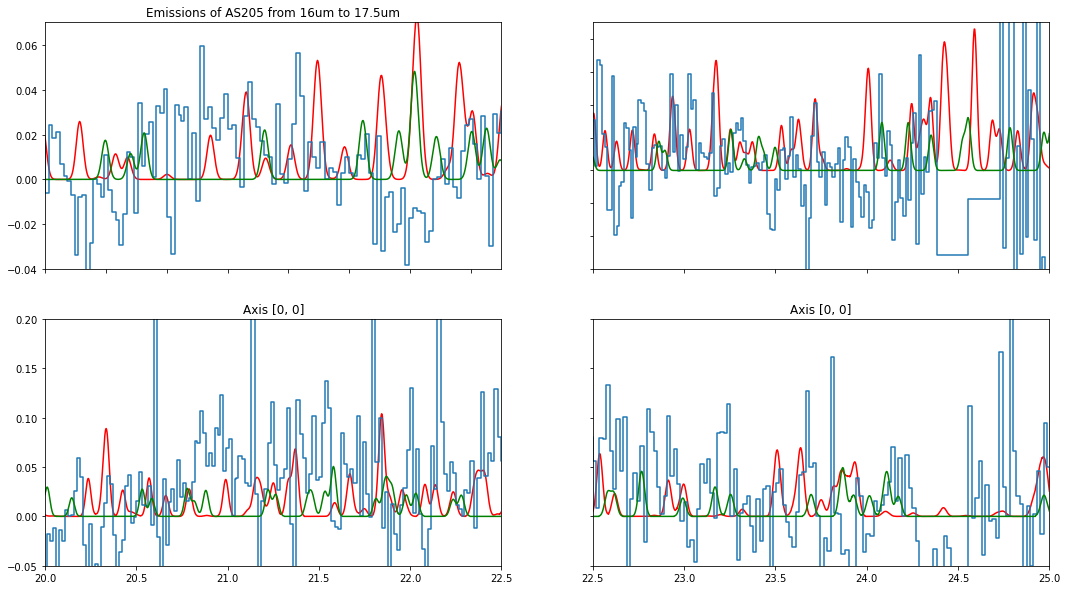

In [18]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 5000

path = os.getcwd() + '/REDUCED/'
rylup=read_irs('RYLUP',dd=path,noerror=True)
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 7000

#+((rylup.wave-16.1)*0.01)
fig, axs = plt.subplots(2, 2,figsize=(18, 10))
axs[0, 0].plot(flux161, flux162, c='red')
axs[0, 0].plot(rylup.wave,rylup.flux, drawstyle='steps-mid')
axs[0, 0].plot(flux181, flux182, c='green')
axs[0, 0].set_xlim(16, 17.5)
axs[0, 0].set_ylim(-.04, .07)
axs[0, 0].set_title('Emissions of AS205 from 16um to 17.5um')
axs[0, 1].plot(flux161, flux162, c='red')
axs[0, 1].plot(rylup.wave,rylup.flux, drawstyle='steps-mid')
axs[0, 1].plot(flux181, flux182, c='green')
axs[0, 1].set_xlim(17.5, 20)
axs[0, 1].set_ylim(-.06, .09)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].plot(flux161, flux162, c='red')
axs[1, 0].plot(rylup.wave,rylup.flux, drawstyle='steps-mid')
axs[1, 0].plot(flux181, flux182, c='green')
axs[1, 0].set_xlim(20, 22.5)
axs[1, 0].set_ylim(-.05, .2)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 1].plot(flux161, flux162, c='red')
axs[1, 1].plot(rylup.wave,rylup.flux, drawstyle='steps-mid')
axs[1, 1].plot(flux181, flux182, c='green')
axs[1, 1].set_xlim(22.5, 25)
axs[1, 1].set_ylim(-.05, .2)
axs[1, 1].set_title('Axis [0, 0]')


for ax in axs.flat:
    ax.label_outer()

(-0.02, 0.3)

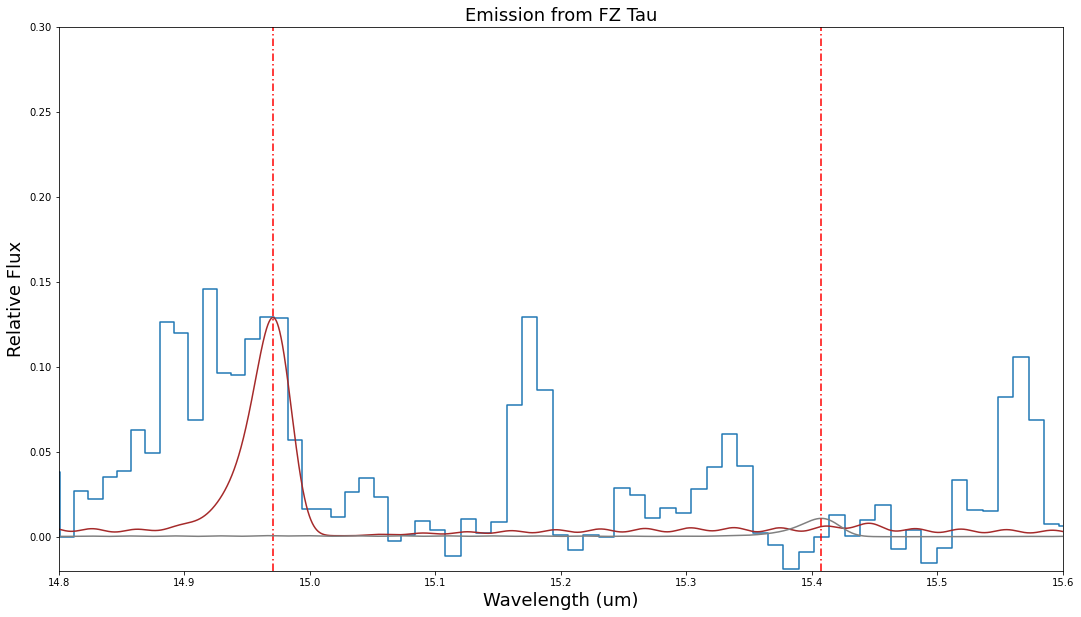

In [19]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 700

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('FZTAU',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from FZ Tau',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.02, .3)

<Figure size 1296x720 with 0 Axes>

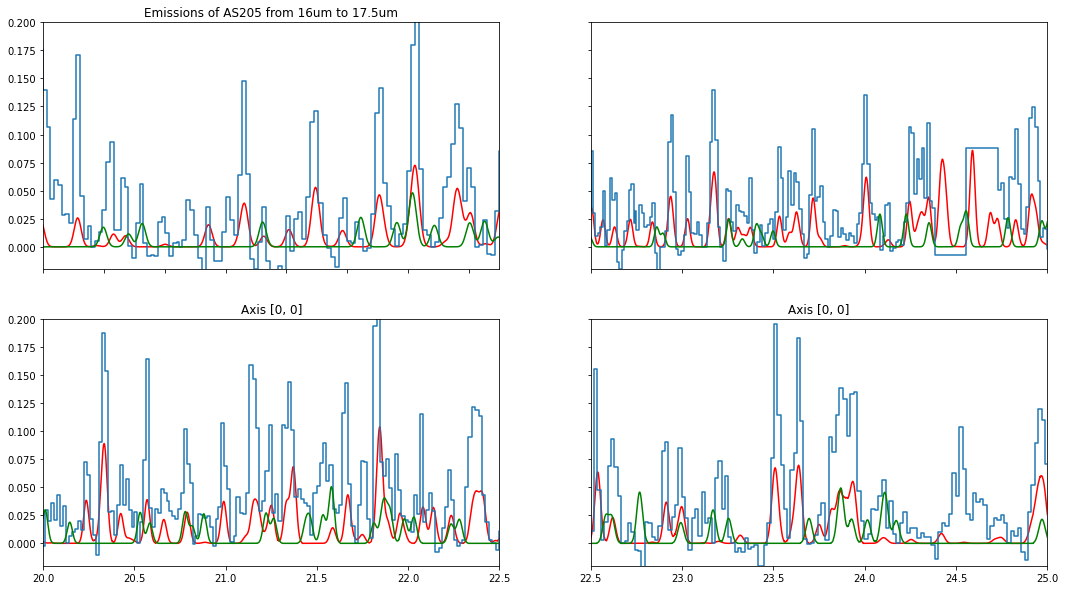

In [20]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 5000

path = os.getcwd() + '/REDUCED/'
fztau=read_irs('FZTAU',dd=path,noerror=True)
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 7000

#+((rylup.wave-16.1)*0.01)
fig, axs = plt.subplots(2, 2,figsize=(18, 10))
axs[0, 0].plot(flux161, flux162, c='red')
axs[0, 0].plot(fztau.wave,fztau.flux, drawstyle='steps-mid')
axs[0, 0].plot(flux181, flux182, c='green')
axs[0, 0].set_xlim(16, 17.5)
axs[0, 0].set_ylim(-.02, .2)
axs[0, 0].set_title('Emissions of AS205 from 16um to 17.5um')
axs[0, 1].plot(flux161, flux162, c='red')
axs[0, 1].plot(fztau.wave,fztau.flux, drawstyle='steps-mid')
axs[0, 1].plot(flux181, flux182, c='green')
axs[0, 1].set_xlim(17.5, 20)
axs[0, 1].set_ylim(-.02, .2)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].plot(flux161, flux162, c='red')
axs[1, 0].plot(fztau.wave,fztau.flux, drawstyle='steps-mid')
axs[1, 0].plot(flux181, flux182, c='green')
axs[1, 0].set_xlim(20, 22.5)
axs[1, 0].set_ylim(-.02, .2)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 1].plot(flux161, flux162, c='red')
axs[1, 1].plot(fztau.wave,fztau.flux, drawstyle='steps-mid')
axs[1, 1].plot(flux181, flux182, c='green')
axs[1, 1].set_xlim(22.5, 25)
axs[1, 1].set_ylim(-.02, .2)
axs[1, 1].set_title('Axis [0, 0]')


for ax in axs.flat:
    ax.label_outer()

(-0.02, 0.035)

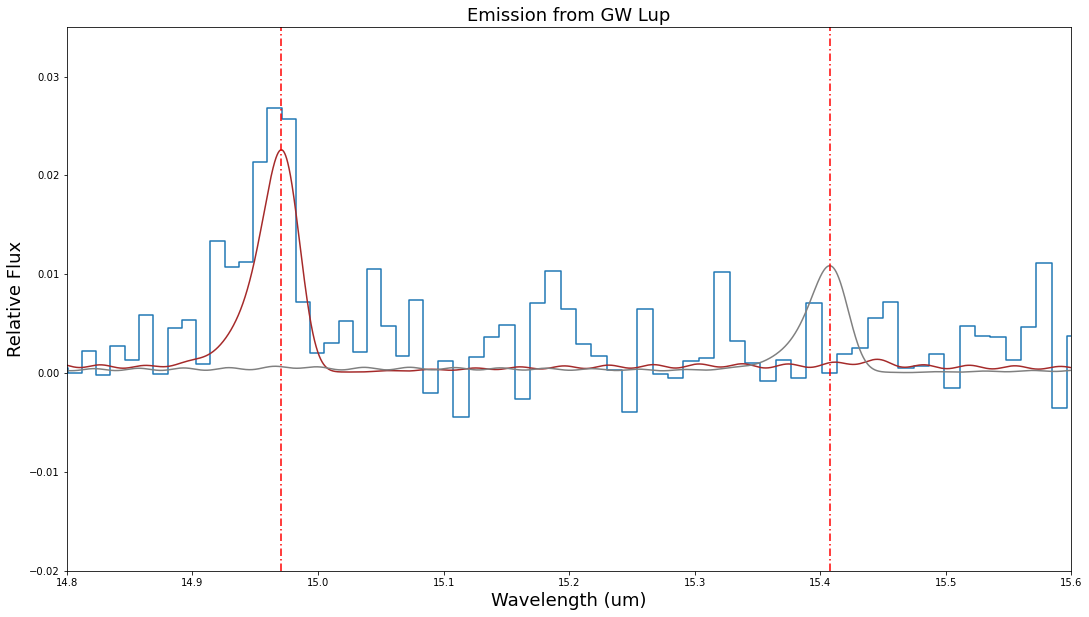

In [21]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('GWLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from GW Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.02, .035)

<Figure size 1296x720 with 0 Axes>

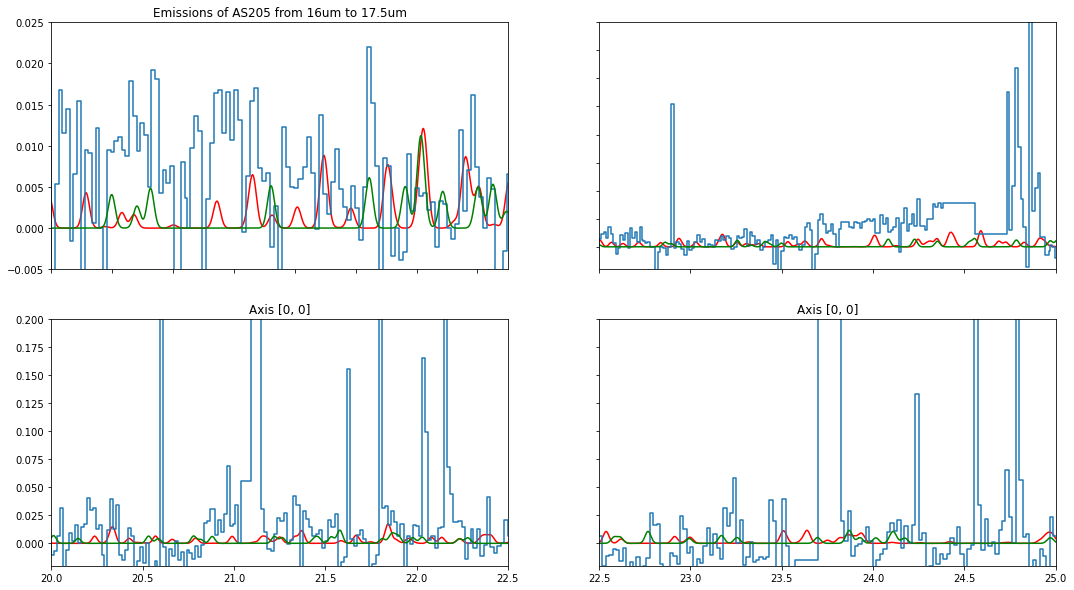

In [22]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 30000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('GWLUP',dd=path,noerror=True)
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 30000

#+((rylup.wave-16.1)*0.01)
fig, axs = plt.subplots(2, 2,figsize=(18, 10))
axs[0, 0].plot(flux161, flux162, c='red')
axs[0, 0].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[0, 0].plot(flux181, flux182, c='green')
axs[0, 0].set_xlim(16, 17.5)
axs[0, 0].set_ylim(-.005, .025)
axs[0, 0].set_title('Emissions of AS205 from 16um to 17.5um')
axs[0, 1].plot(flux161, flux162, c='red')
axs[0, 1].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[0, 1].plot(flux181, flux182, c='green')
axs[0, 1].set_xlim(17.5, 20)
axs[0, 1].set_ylim(-.02, .2)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].plot(flux161, flux162, c='red')
axs[1, 0].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[1, 0].plot(flux181, flux182, c='green')
axs[1, 0].set_xlim(20, 22.5)
axs[1, 0].set_ylim(-.02, .2)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 1].plot(flux161, flux162, c='red')
axs[1, 1].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
axs[1, 1].plot(flux181, flux182, c='green')
axs[1, 1].set_xlim(22.5, 25)
axs[1, 1].set_ylim(-.02, .2)
axs[1, 1].set_title('Axis [0, 0]')


for ax in axs.flat:
    ax.label_outer()

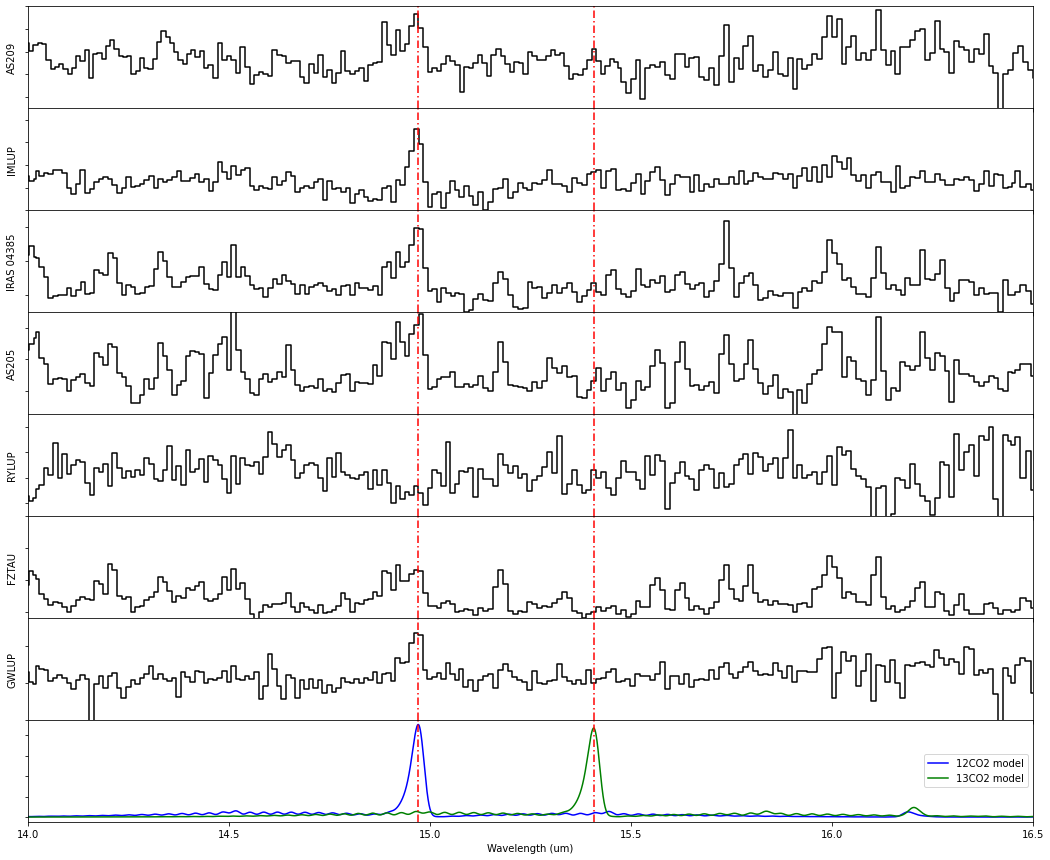

In [23]:
gridspec_kw = dict(
    
    height_ratios=(1, 1,1,1,1,1,1,1),
    hspace=0,
)
r = 8
fig, axes = plt.subplots(
    nrows=r, ncols=1, sharex=True, gridspec_kw=gridspec_kw,figsize=(18, 15)
)

path = os.getcwd() + '/REDUCED/'
as205=read_irs('AS205_c2d',dd=path,noerror=True)
as209=read_irs('V1121OPH',dd=path,noerror=True)
imlup=read_irs('IMLUP',dd=path,noerror=True)
rylup=read_irs('RYLUP',dd=path,noerror=True)
fztau=read_irs('FZTAU',dd=path,noerror=True)
gwlup=read_irs('GWLUP',dd=path,noerror=True)
iras = read_irs('04385+2550',dd=path,noerror=True)

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux']
flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux']

axes[0].plot(as209.wave,as209.flux, drawstyle='steps-mid', c='black')
axes[0].set_ylim(-.075, .15)
axes[0].set_ylabel('AS209')
axes[1].plot(imlup.wave,imlup.flux, drawstyle='steps-mid', c='black')
axes[1].set_ylim(-.01, .035)
axes[1].set_ylabel('IMLUP')
axes[2].plot(iras.wave,iras.flux, drawstyle='steps-mid', c='black')
axes[2].set_ylim(-.01, .05)
axes[2].set_ylabel('IRAS 04385')
axes[3].plot(as205.wave,as205.flux, drawstyle='steps-mid', c='black')
axes[3].set_ylim(-.15, .5)
axes[3].set_ylabel('AS205')
axes[4].plot(rylup.wave,rylup.flux, drawstyle='steps-mid', c='black')
axes[4].set_ylim(-.03, .05)
axes[4].set_ylabel('RYLUP')
axes[5].plot(fztau.wave,fztau.flux, drawstyle='steps-mid', c='black')
axes[5].set_ylim(-.02, .3)
axes[5].set_ylabel('FZTAU')
axes[6].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid', c='black')
axes[6].set_ylim(-.02, .035)
axes[6].set_ylabel('GWLUP')
axes[7].plot(flux121, flux122, label='12CO2 model', c = 'blue')
axes[7].plot(flux131, flux132, label='13CO2 model', c = 'green')

for i in range(r):
    axes[i].axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
    axes[i].axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))
    axes[i].set_yticklabels([])
    i=i+1
    

plt.xlabel('Wavelength (um)')
plt.legend(loc="center right")

plt.xlim(14, 16.5)

plt.show()

In [24]:
fig=plt.figure(1,figsize=(18,10))

path = os.getcwd() + '/REDUCED/'
as205=read_irs('AS205_c2d',dd=path,noerror=True)
as209=read_irs('V1121OPH',dd=path,noerror=True)
imlup=read_irs('IMLUP',dd=path,noerror=True)
rylup=read_irs('RYLUP',dd=path,noerror=True)
fztau=read_irs('FZTAU',dd=path,noerror=True)
gwlup=read_irs('GWLUP',dd=path,noerror=True)

avg_val = [0]*1652

tot = [as205, as209, imlup, rylup, fztau, gwlup]

for i in tot:
    for j in range(len(i)):
        if as205.wave[1651]-i.wave[j]>0:
            assigned = min(range(len(as205.wave), key=lambda x:abs(x-i.wave[j])))
            print(assigned)
            avg_val[assigned] += i.flux[j]
            

as205.flux*.2+as209.flux*1.45+imlup.flux*6.7+rylup.flux*6.7+fztau.flux*1.53+gwlup.flux*7.7
#print(as205.flux, fztau.wave, as209.flux, as209.wave)
#print(as205.flux[1])
plt.plot(as205.wave,avg_val, drawstyle='steps-mid')
plt.axvline(x=15.41, c='red', dashes=(5, 2, 1, 2))
plt.axvline(x=14.97, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from AS205',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14, 16.5)
plt.ylim(-.1, .5)

TypeError: range() takes no keyword arguments

<Figure size 1296x720 with 0 Axes>

In [66]:
au=1.5e11
gap = 200
num = 5
for i in range(num):
    globals()['model_output%s' % i]=make_spec('H2O',1e19, (1+i)*gap,np.pi*(1*au)**2.,wmin=15,wmax=30,convol_fwhm=500.,d_pc=140.,isotopologue_number=2)
    i+=1
    print (i)
#model_output=make_spec('H2O',1e22,300,np.pi*(1*au)**2.,wmin=20,wmax=30,convol_fwhm=500.,d_pc=140.)



Reading partition function from:  https://hitran.org/data/Q/q2.txt
1
Reading partition function from:  https://hitran.org/data/Q/q2.txt
2
Reading partition function from:  https://hitran.org/data/Q/q2.txt
3
Reading partition function from:  https://hitran.org/data/Q/q2.txt
4
Reading partition function from:  https://hitran.org/data/Q/q2.txt
5


(1, 1.005)

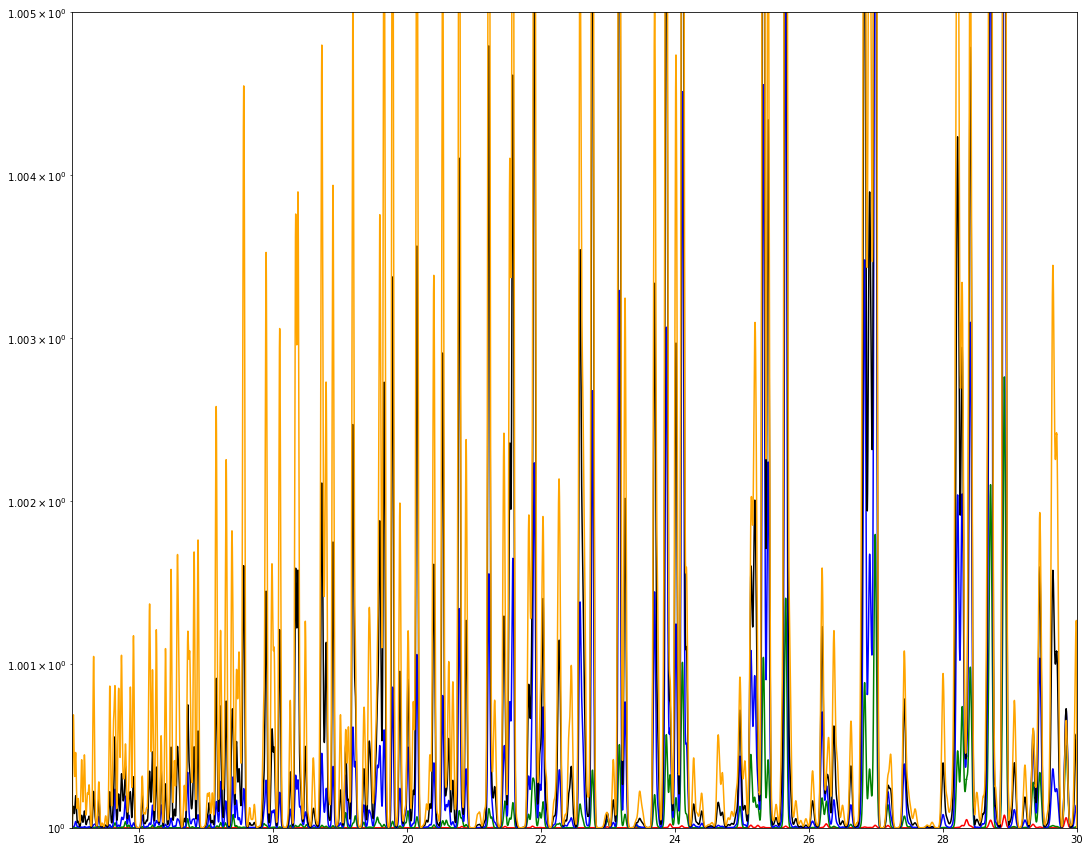

In [102]:
colors = ['red', 'green', 'blue', 'black', 'orange']
fig=plt.figure(figsize=(18,15))
ax1=fig.add_subplot(111)
ax1.set_yscale("log")
for i in range(num):
    ax1.plot(globals()['model_output%s' % i]['spectrum']['wave'],globals()['model_output%s' % i]['spectrum']['convolflux']+1,colors[i],label=(i+1)*gap)
#ax1.legend()
plt.xlim(15, 30)
plt.ylim(1, 1.005)


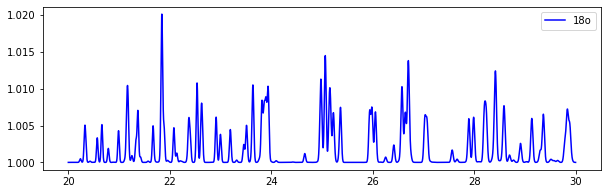

In [68]:
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
#ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['flux']+1,label='16o')
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['convolflux']+1,'b',label='18o')
ax1.legend()

<Figure size 1296x720 with 0 Axes>

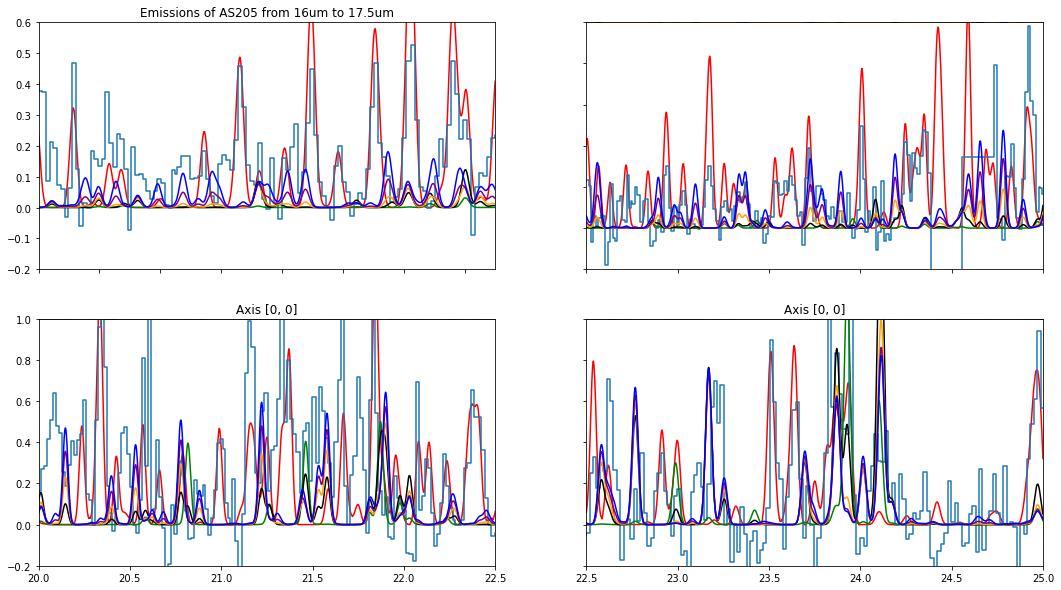

In [109]:
fig=plt.figure(1,figsize=(18,10))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 400

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('AS205_c2d',dd=path,noerror=True)
flux00 = model_output0['spectrum']['wave']
flux01 = model_output0['spectrum']['convolflux'] *50000
flux10 = model_output1['spectrum']['wave']
flux11 = model_output1['spectrum']['convolflux'] *1500
flux20 = model_output2['spectrum']['wave']
flux21 = model_output2['spectrum']['convolflux'] *220
flux30 = model_output3['spectrum']['wave']
flux31 = model_output3['spectrum']['convolflux'] *100
flux40 = model_output4['spectrum']['wave']
flux41 = model_output4['spectrum']['convolflux'] *70


fig, axs = plt.subplots(2, 2,figsize=(18, 10))
axs[0, 0].plot(flux161, flux162, c='red')
axs[0, 0].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')

axs[0, 0].set_xlim(16, 17.5)
axs[0, 0].set_ylim(-.2, 0.6)
axs[0, 0].set_title('Emissions of AS205 from 16um to 17.5um')
axs[0, 1].plot(flux161, flux162, c='red')
axs[0, 1].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')

axs[0, 1].set_xlim(17.5, 20)
axs[0, 1].set_ylim(-.2, 1)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].plot(flux161, flux162, c='red')
axs[1, 0].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')

axs[1, 0].set_xlim(20, 22.5)
axs[1, 0].set_ylim(-.2, 1)
axs[1, 0].set_title('Axis [0, 0]')
axs[1, 1].plot(flux161, flux162, c='red')
axs[1, 1].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')

axs[1, 1].set_xlim(22.5, 25)
axs[1, 1].set_ylim(-.2, 1)
axs[1, 1].set_title('Axis [0, 0]')

axs[0, 0].plot(flux00, flux01, c='green', label='200K')
axs[0, 1].plot(flux00, flux01, c='green', label='200K')
axs[1, 0].plot(flux00, flux01, c='green', label='200K')
axs[1, 1].plot(flux00, flux01, c='green', label='200K')

axs[0, 0].plot(flux10, flux11, c='black', label='400K')
axs[0, 1].plot(flux10, flux11, c='black', label='400K')
axs[1, 0].plot(flux10, flux11, c='black', label='400K')
axs[1, 1].plot(flux10, flux11, c='black', label='400K')

axs[0, 0].plot(flux20, flux21, c='orange', label='600K')
axs[0, 1].plot(flux20, flux21, c='orange', label='600K')
axs[1, 0].plot(flux20, flux21, c='orange', label='600K')
axs[1, 1].plot(flux20, flux21, c='orange', label='600K')

axs[0, 0].plot(flux30, flux31, c='purple', label='800K')
axs[0, 1].plot(flux30, flux31, c='purple', label='800K')
axs[1, 0].plot(flux30, flux31, c='purple', label='800K')
axs[1, 1].plot(flux30, flux31, c='purple', label='800K')

axs[0, 0].plot(flux40, flux41, c='blue', label='1000K')
axs[0, 1].plot(flux40, flux41, c='blue', label='1000K')
axs[1, 0].plot(flux40, flux41, c='blue', label='1000K')
axs[1, 1].plot(flux40, flux41, c='blue', label='1000K')

colors = ['red', 'green', 'blue', 'black', 'orange']

for i in range(num):
    axs[0, 0].plot(globals()['model_output%s' % i]['spectrum']['wave'],globals()['model_output%s' % i]['spectrum']['convolflux']+1,colors[i],label=(i+1)*gap)
    axs[0, 1].plot(globals()['model_output%s' % i]['spectrum']['wave'],globals()['model_output%s' % i]['spectrum']['convolflux']+1,colors[i],label=(i+1)*gap)
    axs[1, 0].plot(globals()['model_output%s' % i]['spectrum']['wave'],globals()['model_output%s' % i]['spectrum']['convolflux']+1,colors[i],label=(i+1)*gap)
    axs[1, 1].plot(globals()['model_output%s' % i]['spectrum']['wave'],globals()['model_output%s' % i]['spectrum']['convolflux']+1,colors[i],label=(i+1)*gap)


for ax in axs.flat:
    ax.label_outer()

In [ ]:
!pip install spectools-ir